# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd

In [2]:
dogs_df = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
dogs_df.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
import requests
import os

In [5]:
folder_name= 'rate_dogs'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [6]:
with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)
os.listdir(folder_name)

['image-predictions.tsv']

In [7]:
image_df= pd.read_csv('image-predictions.tsv', sep='\t')

In [8]:
image_df.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [9]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

tweet_ids = dogs_df.tweet_id.values
len(tweet_ids)

count = 0
fails_dict = {}
start = timer()

with open('tweet_json.txt', 'w') as outfile:
   
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.errors.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193


AttributeError: module 'tweepy.errors' has no attribute 'TweepError'

In [ ]:
import json

In [10]:
df_list = []

with open('tweet-json.txt') as file:
    for line in file:
        df_list.append(json.loads(line))

In [11]:
print(df_list[0])

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017', 'id': 892420643555336193, 'id_str': '892420643555336193', 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", 'truncated': False, 'display_text_range': [0, 85], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}, 'extended_entities': {'media

In [12]:
tweet_df = pd.DataFrame(df_list, columns = ['id', 'retweet_count', 'favorite_count'])
tweet_df.head(3)

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461


In [13]:
tweet_df = tweet_df.rename(columns= {'id':'tweet_id'})

In [14]:
list(tweet_df)

['tweet_id', 'retweet_count', 'favorite_count']

In [15]:
tweet_df.to_csv('tweet_df.csv')

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.

## dogs_df

In [16]:
dogs_df.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [17]:
dogs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [18]:
dogs_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [19]:
dogs_df.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [20]:
dogs_df.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [21]:
dogs_df[dogs_df.rating_denominator != 10].count()[0]

23

In [22]:
dogs_df[dogs_df.rating_denominator != 10].tweet_id

313     835246439529840640
342     832088576586297345
433     820690176645140481
516     810984652412424192
784     775096608509886464
902     758467244762497024
1068    740373189193256964
1120    731156023742988288
1165    722974582966214656
1202    716439118184652801
1228    713900603437621249
1254    710658690886586372
1274    709198395643068416
1351    704054845121142784
1433    697463031882764288
1598    686035780142297088
1634    684225744407494656
1635    684222868335505415
1662    682962037429899265
1663    682808988178739200
1779    677716515794329600
1843    675853064436391936
2335    666287406224695296
Name: tweet_id, dtype: int64

In [23]:
dogs_df[dogs_df.rating_numerator < 10].count()[0]

440

In [24]:
dogs_df[dogs_df.rating_numerator != 13].count()[0]

2005

In [25]:
dogs_df[dogs_df.rating_numerator > 13].count()[0]

82

In [26]:
dogs_df.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1904,674632714662858753,NaN,NaN,2015-12-09 16:52:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Rare submerged pup here. Holds breath for a lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674632714...,5,10,None,None,None,None,None
1565,688064179421470721,NaN,NaN,2016-01-15 18:24:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kilo. He's a Pouncing Brioche. Really ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/688064179...,11,10,Kilo,None,None,None,None
949,752309394570878976,NaN,NaN,2016-07-11 01:11:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Everyone needs to watch this. 1...,6.753544e+17,4.196984e+09,2015-12-11 16:40:19 +0000,https://twitter.com/dog_rates/status/675354435...,13,10,None,None,None,None,None
2213,668567822092664832,NaN,NaN,2015-11-22 23:12:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Marvin. He can tie a bow tie better th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668567822...,11,10,Marvin,None,None,None,None
216,850753642995093505,NaN,NaN,2017-04-08 16:54:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Kyle. He made a joke about your shoes,...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/850753642...,11,10,Kyle,None,None,None,None
2142,669972011175813120,NaN,NaN,2015-11-26 20:12:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we see really big dog cuddling smaller do...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669972011...,10,10,None,None,None,None,None
151,862831371563274240,NaN,NaN,2017-05-12 00:46:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zooey. She's the world's biggest fan o...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/862831371...,13,10,Zooey,None,None,None,None
1571,687704180304273409,NaN,NaN,2016-01-14 18:33:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Blakely. He thinks that's a hat. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/687704180...,9,10,Blakely,None,None,pupper,None
2183,668989615043424256,NaN,NaN,2015-11-24 03:08:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bernie. He's taking his Halloween cost...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668989615...,3,10,Bernie,None,None,None,None
1297,707776935007539200,NaN,NaN,2016-03-10 03:55:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sadie. She's a Bohemian Rhapsody. Rema...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/707776935...,11,10,Sadie,None,None,None,None


In [27]:
dogs_df.rating_numerator.describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

## Image_df

In [28]:
image_df.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [29]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [30]:
image_df.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1334,757741869644341248,https://pbs.twimg.com/media/CoQKNY7XYAE_cuX.jpg,1,skunk,0.609715,False,Old_English_sheepdog,0.128899,True,Siberian_husky,0.019076,True
326,671891728106971137,https://pbs.twimg.com/media/CVMJ9guXAAAhAiK.jpg,1,Labrador_retriever,0.567933,True,golden_retriever,0.349401,True,seat_belt,0.069396,False
1036,711968124745228288,https://pbs.twimg.com/media/CeFrO3qXEAADRbd.jpg,1,espresso,0.430135,False,coffee_mug,0.418483,False,cup,0.088391,False
1239,746872823977771008,https://pbs.twimg.com/media/Cl1s1p7WMAA44Vk.jpg,1,Pembroke,0.540201,True,beagle,0.207835,True,Italian_greyhound,0.043565,True
1399,768596291618299904,https://pbs.twimg.com/media/CqqaPjqWIAAOyNL.jpg,1,Great_Pyrenees,0.729745,True,golden_retriever,0.237961,True,Labrador_retriever,0.020903,True
696,684481074559381504,https://pbs.twimg.com/media/CX_D6AJWwAAnBIw.jpg,1,Chihuahua,0.937810,True,Pomeranian,0.020307,True,polecat,0.017357,False
606,679877062409191424,https://pbs.twimg.com/media/CW9olDsUsAA0XSf.jpg,1,hog,0.809466,False,hay,0.060178,False,lumbermill,0.016483,False
49,666835007768551424,https://pbs.twimg.com/media/CUES51dXIAEahyG.jpg,1,Airedale,0.448459,True,toy_poodle,0.124030,True,teddy,0.110183,False
1248,747816857231626240,https://pbs.twimg.com/media/CmDHdCoWkAACTB4.jpg,1,Pembroke,0.768923,True,Chihuahua,0.029053,True,Shetland_sheepdog,0.029035,True
1389,766423258543644672,https://pbs.twimg.com/media/CqLh4yJWcAAHomv.jpg,2,keeshond,0.995823,True,Pomeranian,0.003897,True,Norwegian_elkhound,0.000253,True


## tweet_df

In [31]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [32]:
tweet_df.sample(10)

,tweet_id,retweet_count,favorite_count
1200,716439118184652801,247,2574
1245,711652651650457602,1037,4228
63,879674319642796034,10,315
1982,672902681409806336,550,1452
1921,674082852460433408,186,804
1137,728015554473250816,1219,4479
226,848324959059550208,4037,20229
1643,683849932751646720,1116,2896
1047,743222593470234624,2164,6792
650,792773781206999040,1963,8209


### Quality issues

1. Tweet_id is an integer and not object for all dataframes

Dogs_df

2. Invalid data type for timestamp(datetime not object).
3. Invalid names like None and a.
4. Some denominator figure are either less or greater than 10 with 1 tweet_id having denominator as 0.
5. 440 numerators are less than 10, WeRateDogs is know for mostly rating dogs above 10
6. There are 181 retweets, we only need original retweets



Image_df

7. Dog breed(p1,p2 and p3) is not uniform(some start with small letters while some start with block letters).
8. Underscore used in dog breed as opposed to spaces.
9. Missing data, only 2075 rows instead of 2356 rows.



Tweet_df

10. Missing rows (2354 and not 2356).

### Tidiness issues
1. Dog stages are broken down into 4 columns.
2. Dog breed is broken down into several columns.
3. All three dataset are related and should be in one dataset 

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [33]:
# Make copies of original pieces of data
dogs_clean = dogs_df.copy()
image_clean = image_df.copy()
tweet_clean = tweet_df.copy()

In [34]:
import numpy as np

### Tidiness Issue

### Issue #1: Dog stages are broken down into 4 columns

#### Define: Create a dog_stage column containing doggo, floofer, pupper and puppo.

#### Code

In [35]:
dogs_clean.doggo.replace('None', '', inplace=True)
dogs_clean.floofer.replace('None', '', inplace=True)
dogs_clean.pupper.replace('None', '', inplace=True)
dogs_clean.puppo.replace('None', '', inplace=True)

In [36]:
dogs_clean.doggo.replace(np.NaN, '', inplace=True)
dogs_clean.floofer.replace(np.NaN, '', inplace=True)
dogs_clean.pupper.replace(np.NaN, '', inplace=True)
dogs_clean.puppo.replace(np.NaN, '', inplace=True)

In [37]:
dogs_clean['dog_stage'] = dogs_clean.doggo + dogs_clean.floofer + dogs_clean.pupper + dogs_clean.puppo
dogs_clean.loc[dogs_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
dogs_clean.loc[dogs_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
dogs_clean.loc[dogs_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

#### Test

In [38]:
dogs_clean.dog_stage.value_counts()

                  1976
pupper             245
doggo               83
puppo               29
doggo, pupper       12
floofer              9
doggo, puppo         1
doggo, floofer       1
Name: dog_stage, dtype: int64

#### Drop the doggo, floofer, pupper and puppo column

In [39]:
dogs_clean = dogs_clean.drop(columns= ['doggo', 'floofer', 'pupper', 'puppo'])

In [40]:
dogs_clean.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,


### Issue 2: Dog breed is broken down into several columns

#### Define: Pick the prediction with the highest confidence, delete the unwanted columns and rows without prediction.

#### Code

In [41]:
conditions = [(image_clean['p1_dog'] == True),
              (image_clean['p2_dog'] == True),
              (image_clean['p3_dog'] == True)]

choices_breed = [image_clean['p1'],
                image_clean['p2'],
                image_clean['p3']]

choices_confidence = [image_clean['p1_conf'],
                      image_clean['p2_conf'],
                      image_clean['p3_conf']]

image_clean['dog_breed'] = np.select(conditions,choices_breed,
                        default = 'none')

image_clean['confidence'] = np.select(conditions, choices_confidence, default=0)

In [42]:
image_clean = image_clean.drop(['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis=1)

In [43]:
image_clean.dog_breed.value_counts()

none                    324
golden_retriever        173
Labrador_retriever      113
Pembroke                 96
Chihuahua                95
                       ... 
Scotch_terrier            1
EntleBucher               1
Japanese_spaniel          1
standard_schnauzer        1
Bouvier_des_Flandres      1
Name: dog_breed, Length: 114, dtype: int64

#### Test

In [44]:
list(image_clean)

['tweet_id', 'jpg_url', 'img_num', 'dog_breed', 'confidence']

### Issue 3: All three dataset are related and should be in one dataset 

#### Define: Merge all tables(dogs_clean, image_clean and twitter_clean) into one dataframe using pd.merge

#### Code

In [45]:
master_df = pd.merge(dogs_clean, image_clean, on= 'tweet_id', how= 'left')
master_df = pd.merge(master_df, tweet_clean, on= 'tweet_id', how= 'left')

#### Test

In [46]:
list(master_df)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dog_stage',
 'jpg_url',
 'img_num',
 'dog_breed',
 'confidence',
 'retweet_count',
 'favorite_count']

In [47]:
master_df.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,dog_breed,confidence,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,none,0.000000,8853.0,39467.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,6514.0,33819.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,4328.0,25461.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,Labrador_retriever,0.168086,8964.0,42908.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,9774.0,41048.0


In [48]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  dog_stage                   2356 

## Quality Issues

### Issue 1: There are 181 retweets, we only need original retweets

#### Define: Drop retweeted_status_id rows

#### Code

In [49]:
master_df = master_df[pd.isnull(master_df.retweeted_status_id)]

#### Test

In [50]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  dog_stage                   2175 

#### Drop unwanted columns

In [51]:
master_df = master_df.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

In [52]:
list(master_df)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dog_stage',
 'jpg_url',
 'img_num',
 'dog_breed',
 'confidence',
 'retweet_count',
 'favorite_count']

### Issue 2: Tweet_id is an integer and not object for all dataframes

### Issue 3: Invalid data type for timestamp(datetime not object).

#### Define Issue 2: Convert tweet_id to an object from string
#### Define Issue 3: Convert object datatype to timedate datatime for the column timestamp

#### Code

In [53]:
master_df.tweet_id = master_df.tweet_id.astype(str)
master_df.timestamp = pd.to_datetime(master_df.timestamp).dt.tz_localize(None)

#### Test

In [54]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2175 non-null   object        
 1   timestamp           2175 non-null   datetime64[ns]
 2   source              2175 non-null   object        
 3   text                2175 non-null   object        
 4   expanded_urls       2117 non-null   object        
 5   rating_numerator    2175 non-null   int64         
 6   rating_denominator  2175 non-null   int64         
 7   name                2175 non-null   object        
 8   dog_stage           2175 non-null   object        
 9   jpg_url             1994 non-null   object        
 10  img_num             1994 non-null   float64       
 11  dog_breed           1994 non-null   object        
 12  confidence          1994 non-null   float64       
 13  retweet_count       2175 non-null   float64     

### Issue 4: Invalid names like a and an and names starting with lower case

#### Define: Find the list of wrong names and assign None to them for conformity

#### Code

In [55]:
wrong_name_list = list(master_df.query('name == "a" or name == "an"').index)
for i in wrong_name_list:     
    master_df.name[i] = "None"

C:\Users\BIBI\AppData\Local\Temp\ipykernel_20364\1907372684.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  master_df.name[i] = "None"


In [56]:
master_df[master_df.name.str.islower()].name.value_counts()

the             8
one             4
very            4
just            3
quite           3
not             2
actually        2
getting         2
such            1
old             1
light           1
life            1
officially      1
by              1
infuriating     1
mad             1
all             1
unacceptable    1
this            1
his             1
my              1
incredibly      1
space           1
Name: name, dtype: int64

In [57]:
mask = master_df.name.str.islower()
column_name = 'name'
master_df.loc[(mask), column_name] = np.nan

In [58]:
master_df['name'].replace('None', np.nan, inplace=True)

#### Test

In [59]:
master_df.name.value_counts()

Charlie       11
Lucy          11
Cooper        10
Oliver        10
Penny          9
              ..
Shiloh         1
Gustav         1
Arlen          1
Lenox          1
Christoper     1
Name: name, Length: 930, dtype: int64

### Issue 5: Some denominator figure are either less or greater than 10 with 1 tweet_id having denominator as 0.

#### Define: Identify and drop rows where denominator =! 10

#### Code

In [60]:
not_ten = list(master_df.query("rating_denominator != 10").index)
master_df.drop(index=not_ten, inplace=True)

#### Test

In [61]:
master_df[master_df.rating_denominator != 10].count()[0]

0

### Issue 6: Dog breed(p1,p2 and p3) is not uniform(some start with small letters while some start with block letters).
### Issue 7: Underscore used in dog breed as opposed to spaces.

#### Define: Issue 6: make dog_breed lowercase
#### Define: Issue 7 :Replace all Underscore(_) with ( ) in dog_breed
#### Code

In [62]:
master_df.dog_breed = master_df.dog_breed.str.replace("_", " ")
master_df.dog_breed = master_df.dog_breed.str.lower()

#### Test

In [63]:
master_df.dog_breed.value_counts()

none                  307
golden retriever      154
labrador retriever    105
pembroke               95
chihuahua              90
                     ... 
scotch terrier          1
entlebucher             1
japanese spaniel        1
standard schnauzer      1
irish wolfhound         1
Name: dog_breed, Length: 114, dtype: int64

In [64]:
master_df.head(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,dog_breed,confidence,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,none,0.000000,8853.0,39467.0
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,chihuahua,0.323581,6514.0,33819.0
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,chihuahua,0.716012,4328.0,25461.0
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,labrador retriever,0.168086,8964.0,42908.0
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,9774.0,41048.0


## Issue 8 Missing data, only 2075 rows instead of 2356 rows.

#### Define: Remove rows without image

#### Code

In [65]:
master_data = master_df[master_df.jpg_url.notnull()]

#### Test

In [66]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1976 entries, 0 to 2355
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1976 non-null   object        
 1   timestamp           1976 non-null   datetime64[ns]
 2   source              1976 non-null   object        
 3   text                1976 non-null   object        
 4   expanded_urls       1976 non-null   object        
 5   rating_numerator    1976 non-null   int64         
 6   rating_denominator  1976 non-null   int64         
 7   name                1347 non-null   object        
 8   dog_stage           1976 non-null   object        
 9   jpg_url             1976 non-null   object        
 10  img_num             1976 non-null   float64       
 11  dog_breed           1976 non-null   object        
 12  confidence          1976 non-null   float64       
 13  retweet_count       1976 non-null   float64     

## Issue 9: Missing rows (2354 and not 2356).

#### Deleted in previous steps when cleaning other issues

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [67]:
master_data.to_csv('clean_master.csv')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [68]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [69]:
master_data.head(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,dog_breed,confidence,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,none,0.000000,8853.0,39467.0
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,chihuahua,0.323581,6514.0,33819.0
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,chihuahua,0.716012,4328.0,25461.0
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,labrador retriever,0.168086,8964.0,42908.0
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,9774.0,41048.0


In [70]:
stages = master_data.dog_stage.value_counts()
print(stages)

                  1670
pupper             203
doggo               63
puppo               22
doggo, pupper        9
floofer              7
doggo, puppo         1
doggo, floofer       1
Name: dog_stage, dtype: int64


In [72]:
count = ['retweet_count', 'favorite_count']
dataset = master_data.groupby('dog_stage')[count].sum()
print(dataset)

                retweet_count  favorite_count
dog_stage                                    
                    4306771.0      14202344.0
doggo                448919.0       1219452.0
doggo, floofer         3433.0         17169.0
doggo, pupper         36751.0        112798.0
doggo, puppo          19196.0         47844.0
floofer               34781.0         92442.0
pupper               479807.0       1461141.0
puppo                142427.0        474806.0


In [73]:
def labels (a, b, c):
    """
    Args:
    a (str): x-axis title(weight = "bold")
    b (str): y-axis title(weight = 'bold')
    c (str): main title(weight = 'bold')
    
    
    Returns:
    None
    """
    
    plt.xlabel(a, weight = 'bold')
    plt.ylabel(b, weight = 'bold')
    plt.title(c, fontsize = 14, weight = 'bold')
    plt.show()

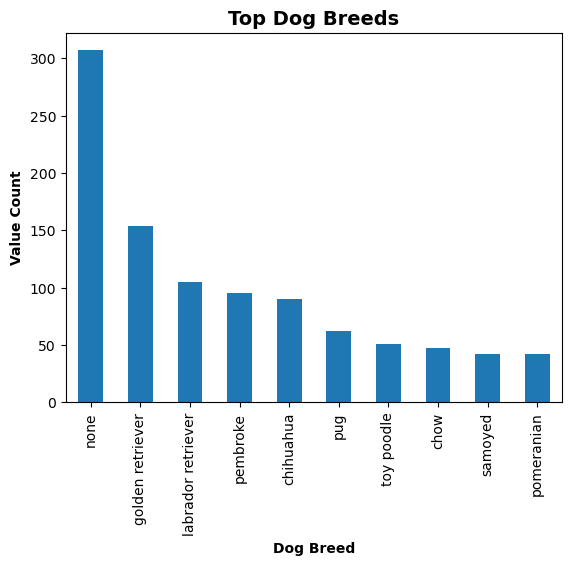

In [74]:
master_data['dog_breed'].value_counts()[:10].plot(kind= 'bar')
labels('Dog Breed', 'Value Count', 'Top Dog Breeds')

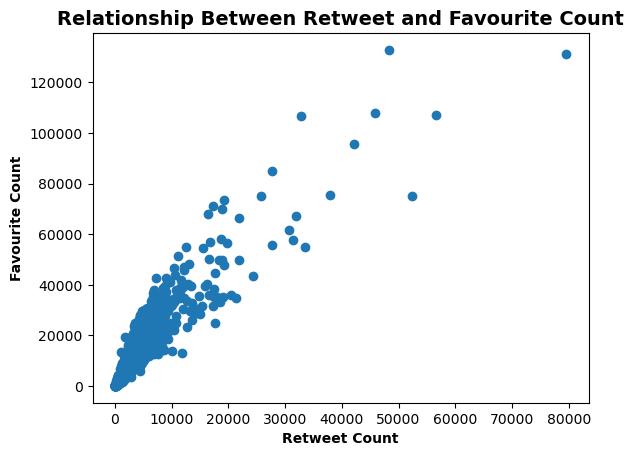

In [75]:
plt.scatter(master_data.retweet_count, master_data.favorite_count)
labels('Retweet Count', 'Favourite Count', 'Relationship Between Retweet and Favourite Count')

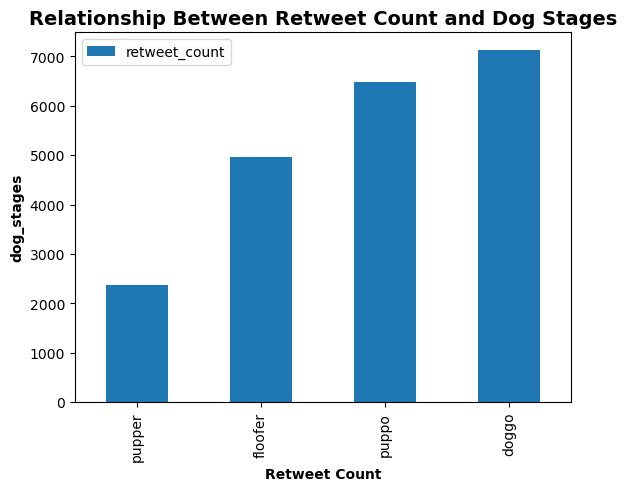

In [76]:
master_data_stage = master_data[master_data["dog_stage"].isnull()==False]
by_stages = master_data_stage.query('dog_stage=="pupper" or dog_stage=="doggo" or dog_stage=="puppo" or dog_stage=="floofer"')
retweet_counts_by_stages = pd.DataFrame(by_stages.groupby('dog_stage').retweet_count.mean().sort_values())
retweet_counts_by_stages['stages'] = retweet_counts_by_stages.index
retweet_counts_by_stages.plot(x="stages",y='retweet_count',kind='bar')
labels('Retweet Count', 'dog_stages', 'Relationship Between Retweet Count and Dog Stages')

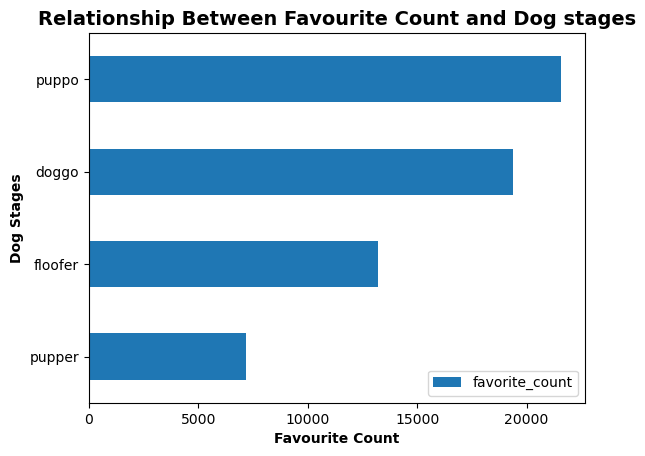

In [77]:
master_data_stage = master_data[master_data["dog_stage"].isnull()==False]
by_stages = master_data_stage.query('dog_stage=="pupper" or dog_stage=="doggo" or dog_stage=="puppo" or dog_stage=="floofer"')
favorite_counts_by_stages = pd.DataFrame(by_stages.groupby('dog_stage').favorite_count.mean().sort_values())
favorite_counts_by_stages['stages'] = favorite_counts_by_stages.index
favorite_counts_by_stages.plot(x="stages",y='favorite_count',kind='barh')
labels('Favourite Count', 'Dog Stages', 'Relationship Between Favourite Count and Dog stages')

In [78]:
count = ['favorite_count']
dataset = master_data.groupby(count)['dog_breed'].sum()
grouped = dataset.groupby(count, sort=False).sum()
grouped.sort_index(ascending=False)[:10]

favorite_count
132810.0           lakeland terrier
131075.0         labrador retriever
107956.0           english springer
107015.0                  chihuahua
106827.0             french bulldog
                     ...           
113.0       black-and-tan coonhound
111.0            miniature pinscher
108.0                          none
107.0        curly-coated retriever
81.0                 english setter
Name: dog_breed, Length: 1835, dtype: object

In [79]:
count = ['retweet_count', 'favorite_count']
dataset = master_data.groupby(count)['dog_breed'].sum()
grouped = dataset.groupby(count, sort=False).sum()
grouped.sort_index(ascending=False)[:10]

retweet_count  favorite_count
79515.0        131075.0          labrador retriever
56625.0        107015.0                   chihuahua
52360.0        75163.0                   eskimo dog
48265.0        132810.0            lakeland terrier
45849.0        107956.0            english springer
42228.0        95450.0              standard poodle
37911.0        75639.0               cocker spaniel
33421.0        55016.0                         none
32883.0        106827.0              french bulldog
31989.0        67100.0                      whippet
Name: dog_breed, dtype: object

### Insights: The data was analysed and the following insights were drawn
1. The value counts of different dog stages with puppo having the highest number

2. The value counts of different dog breed with golden retriever having the highest number

3. There appears to be a relationship between retweet and favorite count

4. While doggo has the highest retweets, puppo has the highest favorites.

5. Lakeland retriever has the highest favorites counts, however, the Lakeland retriever is the most retweeted and liked dog.

### Visualization

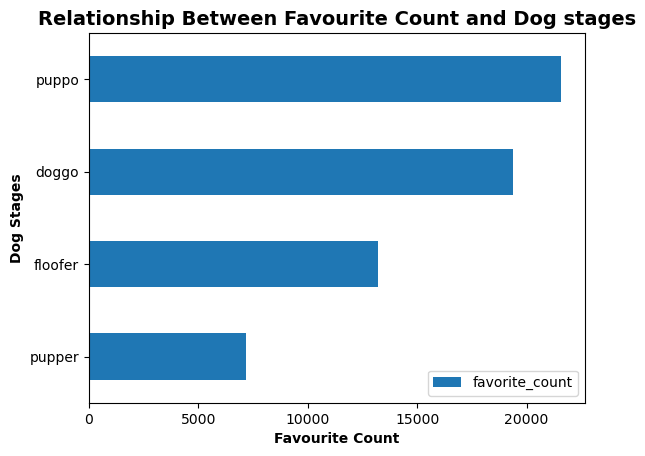

In [81]:
master_data_stage = master_data[master_data["dog_stage"].isnull()==False]
by_stages = master_data_stage.query('dog_stage=="pupper" or dog_stage=="doggo" or dog_stage=="puppo" or dog_stage=="floofer"')
favorite_counts_by_stages = pd.DataFrame(by_stages.groupby('dog_stage').favorite_count.mean().sort_values())
favorite_counts_by_stages['stages'] = favorite_counts_by_stages.index
favorite_counts_by_stages.plot(x="stages",y='favorite_count',kind='barh')
labels('Favourite Count', 'Dog Stages', 'Relationship Between Favourite Count and Dog stages')